In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## fashion_mnist dataset 을 활용한 deep learning 학습 연습

In [2]:
(train_input , train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

target_name = {0:'t-shirt', 1:'pants', 2:'sweater', 3:'dress', 4:'coat', 5:'sandal', 6:'shirt', 7:'sneakers', 8:'bag', 9:'ankle_boots'}

#합성곱층은 3차원의 입력을 기대하기 때문에, 3차원 입력이 여러개인 4차원 으로 값을 변환. 흑백일 경우 깊이가 1, 칼라일경우 깊이 3(RGB)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0 

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


In [3]:
def model_fn():
    model = keras.Sequential()
    
    #합성곱 신경망 : 입력 데이터에 유용한 특성만 드러나도록 함
    model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #합성곱1
    model.add(keras.layers.MaxPooling2D(2)) #풀링1  
    
    model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #합성곱2
    model.add(keras.layers.MaxPooling2D(2)) #풀링2  

    #밀집층
    model.add(keras.layers.Flatten()) #밀집층에 연결하기 위한 flatten
    
    #밀집층 : 은닉층
    model.add(keras.layers.Dense(100,activation='relu'))
    model.add(keras.layers.Dropout(0.4)) # 과대적합을 막기위한 dropout
    
    #밀집층 : 출력층
    model.add(keras.layers.Dense(10,activation='softmax'))
    
    return model

# 활성함수 => 신경망 회로에서, 한 노드에 대해 입력값을 다음 노드에 보낼지 말지에 대해 결정하는 함수. 

In [4]:
model = model_fn()
model.summary()

Metal device set to: Apple M1 Pro


2023-02-26 14:23:37.203457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-26 14:23:37.203579: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

check_point = keras.callbacks.ModelCheckpoint('best_exercise_model.hp5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target), 
                    callbacks=[check_point, early_stopping])


Epoch 1/20


2023-02-26 14:23:37.633942: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 14:23:37.847549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - ETA: 0s - loss: 0.4868 - accuracy: 0.8277

2023-02-26 14:23:53.236170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


1500/1500 [==============================] - 18s 11ms/step - loss: 0.4868 - accuracy: 0.8277 - val_loss: 0.3503 - val_accuracy: 0.8716
Epoch 2/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.3167 - accuracy: 0.8886

INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


1500/1500 [==============================] - 16s 11ms/step - loss: 0.3169 - accuracy: 0.8886 - val_loss: 0.2757 - val_accuracy: 0.9013
Epoch 3/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.9030

INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


1500/1500 [==============================] - 16s 10ms/step - loss: 0.2711 - accuracy: 0.9030 - val_loss: 0.2513 - val_accuracy: 0.9094
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2410 - accuracy: 0.9136 - val_loss: 0.2641 - val_accuracy: 0.9035
Epoch 5/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9219

INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


1500/1500 [==============================] - 16s 11ms/step - loss: 0.2160 - accuracy: 0.9219 - val_loss: 0.2322 - val_accuracy: 0.9151
Epoch 6/20
1500/1500 [==============================] - ETA: 0s - loss: 0.1962 - accuracy: 0.9287

INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


INFO:tensorflow:Assets written to: best_exercise_model.hp5/assets


1500/1500 [==============================] - 16s 11ms/step - loss: 0.1962 - accuracy: 0.9287 - val_loss: 0.2247 - val_accuracy: 0.9186
Epoch 7/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.1763 - accuracy: 0.9342 - val_loss: 0.2455 - val_accuracy: 0.9107
Epoch 8/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.1627 - accuracy: 0.9396 - val_loss: 0.2371 - val_accuracy: 0.9168
Epoch 9/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1474 - accuracy: 0.9446 - val_loss: 0.2333 - val_accuracy: 0.9210


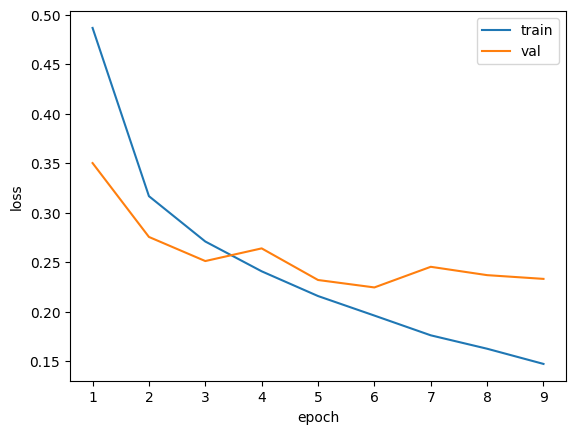

best_epoch : 6


In [6]:
plt.plot(np.linspace(1,len(history.history['loss']),len(history.history['loss'])), history.history['loss'])
plt.plot(np.linspace(1,len(history.history['val_loss']),len(history.history['val_loss'])), history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

print('best_epoch :', early_stopping.best_epoch + 1)

In [7]:
model.evaluate(val_scaled,val_target) #최상의 모델 parameter로 자동 복구하여, 검증모델의 손실값과 정확도가 같음을 볼 수 있다.

375/375 [==============================] - 2s 5ms/step - loss: 0.2247 - accuracy: 0.9186


[0.22465920448303223, 0.918583333492279]